# Taxi rides analysis

# Author: James Amezcua

# Introduction

This short report draws on the Chicago weather data in November 2017 from the website, and information from a database on taxi rides in Chicago. The exploratory analysis of the data and hypothesis testing are intended to understand passenger preferences and the impact of external factors on rides.

The web data has already been retrieved and preprocessed in previous tasks. The database information from its three tables has also been preprocessed. The result of the preprocessing are three datasets:

- a dataset that contains information of the taxi company name and the number of rides each company has November 15-16, 2017;
- a dataset that contains information on Chicago neighborhoods where rides ended, and the average number of rides that ended in each neighborhood in November 2017; and
- a dataseton contains information on the rides from the Loop to O'Hare International Airport.

In what follows, we will first import the datasets, take a look at their shape, check on the datatypes in each and whether the dataset is complete. Then an exploratory analysis will be conducted to show the distribution of the number of rides among the taxi companies, and the top 10 neighbourhoods for average dropoffs. Finally, we will carry out a hypothesis test to see if the average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Saturdays

# Table of content

Part 1: Data importing

Part 2: Data preprocessing

Part 3: Exploratory data analysis

Part 4: Hypothesis Testing

Part 5: Findings and conclusions

# Part 1: Data importing

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

URL = 'https://code.s3.yandex.net/data-analyst-eng/chicago_weather_2017.html'
req = requests.get(URL) 
soup = BeautifulSoup(req.text, 'lxml')

# extract the table of information for Chicago Weather Record using BeautifulSoup
weather = soup.find('table', attrs={'id': 'weather_records'})

# get names of columns for the datarame
heading_table = []
for row in weather.find_all('th'): # column names are inside <th>
    heading_table.append(row.text)
#print(heading_table)
 
# get content of the dataframe
content = []
for row in weather.find_all('tr'): # loop through <tr> tag
    if not row.find_all('th'): # ignore first row of table
        content.append([element.text for element in row.find_all('td')]) # cell content are inside <td> tags
#print(content)

# parse into a dataframe
weather_records = pd.DataFrame(content, columns=heading_table)
print(weather_records)

           Date and time Temperature       Description
0    2017-11-01 00:00:00     276.150     broken clouds
1    2017-11-01 01:00:00     275.700  scattered clouds
2    2017-11-01 02:00:00     275.610   overcast clouds
3    2017-11-01 03:00:00     275.350     broken clouds
4    2017-11-01 04:00:00     275.240     broken clouds
..                   ...         ...               ...
692  2017-11-29 20:00:00     281.340        few clouds
693  2017-11-29 21:00:00     281.690      sky is clear
694  2017-11-29 22:00:00     281.070        few clouds
695  2017-11-29 23:00:00     280.060      sky is clear
696  2017-11-30 00:00:00     278.460      sky is clear

[697 rows x 3 columns]


# Import data files

In [6]:
!pip install squarify
import squarify
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

company_name_trips_amount = pd.read_csv('/datasets/project_sql_result_01.csv')

dropoff_location_avg_trips = pd.read_csv('/datasets/project_sql_result_04.csv')

Defaulting to user installation because normal site-packages is not writeable


# Study data

In [ ]:
company_name_trips_amount.head()
dropoff_location_

In [7]:
#display(company_name_trips_amount)
company_name_trips_amount.info()

#display(dropoff_location_avg_trips)
dropoff_location_avg_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


The company_name_trips_amount table contains the company_name and trips_amount, which is the number of rides for each taxi company on November 15-16, 2017. It has 64 rows of taxi companies.

The dropoff_location_avg_trips table contains the names of the Chicago neighborhoods where dropoffs occured and the average number of rides that ended in each of these Chicago neighborhoods in November 2017.


# Part 2: Data preprocessing

In [8]:
# company_name_trips_amount table

# Change company_name to string
company_name_trips_amount['company_name'] = company_name_trips_amount['company_name'].astype(str)

# Drop duplicates
company_name_trips_amount.drop_duplicates(inplace=True)

# Drop rows with null
company_name_trips_amount.dropna(inplace=True)

# Remove unneccessary numbers and - from the name
company_name_trips_amount['company_name'] = company_name_trips_amount['company_name'].str.replace('\d+ - (\d+)* -*', '')
company_name_trips_amount['company_name'] = company_name_trips_amount['company_name'].str.replace('\d+ - ', '')

To process the company_name_trips_amount table, I casted the company_name column to the string type. Then, I dropped any possible duplicates or NA rows. I found that there were many taxi companies with a '1234 - 1234' before the name of the actual company, so I wrote a regular expression to filter out unnecessary numbers and symbols from the name of the taxi company.

In [9]:
# v table

# Change dropoff_location_name to string
dropoff_location_avg_trips['dropoff_location_name'] = dropoff_location_avg_trips['dropoff_location_name'].astype(str)

# Drop duplicates
dropoff_location_avg_trips.drop_duplicates(inplace=True)

# Drop rows with null
dropoff_location_avg_trips.dropna(inplace=True)

To process the dropoff_location_avg_trips table, I casted the dropoff_location)name column to the string type. Then, I dropped any possible duplicates or NA rows. I didn't find anything strange with the raw data.


# Part 3: Exploratory data analysis

# Identify the top 10 neighborhoods by number of dropoffs (Nov 2017)

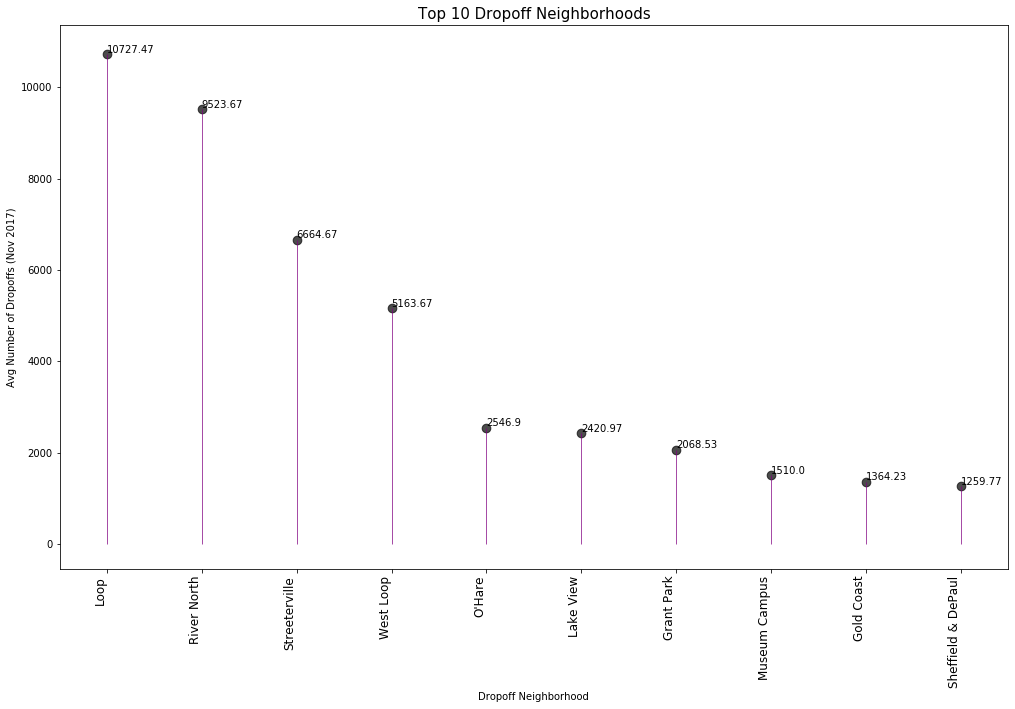

In [10]:
top10dropoffs = dropoff_location_avg_trips.sort_values(by='average_trips',ascending=False).round(decimals=2).head(10)

fig, ax = plt.subplots(figsize=(17,10))
ax.vlines(x=top10dropoffs.dropoff_location_name, ymin=0, ymax=top10dropoffs.average_trips,color='purple',alpha=0.7,linewidth=1)
ax.scatter(x=top10dropoffs.dropoff_location_name,y=top10dropoffs.average_trips, s=75, color='black',alpha=0.7)

ax.set_title("Top 10 Dropoff Neighborhoods", fontdict={'size':15})
ax.set_ylabel('Avg Number of Dropoffs (Nov 2017)')
ax.set_xlabel('Dropoff Neighborhood')
ax.set_xticks(top10dropoffs.dropoff_location_name)
ax.set_xticklabels(top10dropoffs.dropoff_location_name, rotation=90, fontdict={'horizontalalignment':'right','size':12})
for row in top10dropoffs.itertuples():
    ax.text(row.dropoff_location_name, row.average_trips+30,s=round(row.average_trips,2))


To idenfity the top 10 dropoff neighborhoods in Nov 2017, I sorted the dropoff_location_avg_trips table by the average_trips column, rounded the average number to the 2nd decimal point and selected only the top 10 neighborhoods.

# Taxi Companies and number of rides (Nov 15-16, 2017

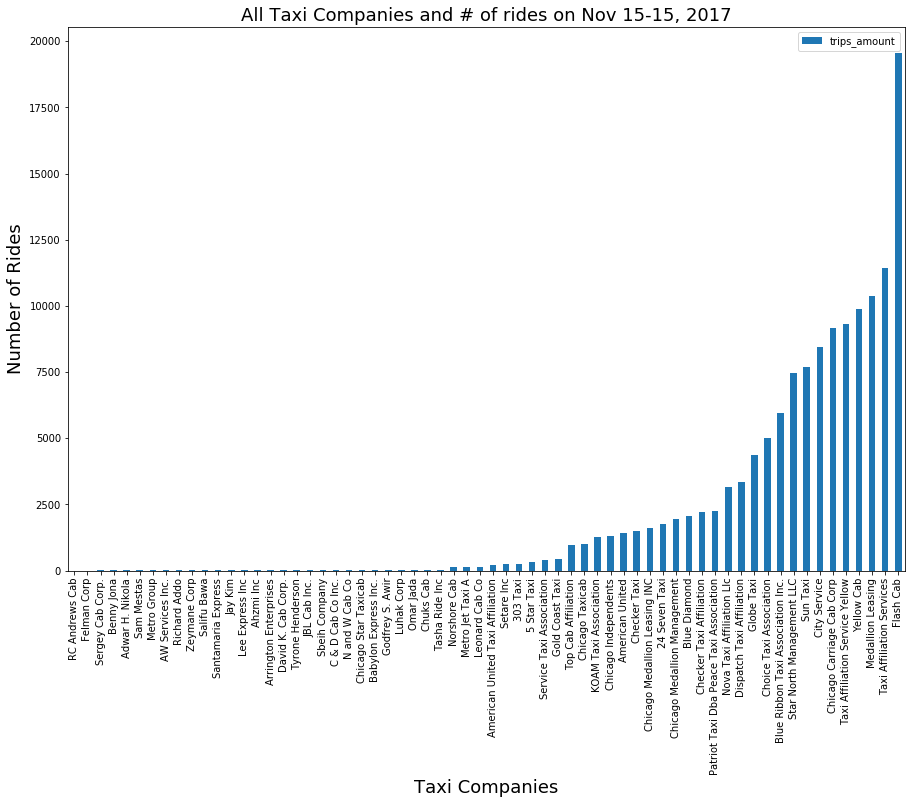

In [11]:
# Plot all taxi companies

plotData = company_name_trips_amount.sort_values(by='trips_amount')
ax = plotData.plot(kind='bar', x='company_name', y='trips_amount',figsize=(15,10))

ax.set_title("All Taxi Companies and # of rides on Nov 15-15, 2017", fontsize=18)
ax.set_ylabel("Number of Rides", fontsize=18);
ax.set_xlabel("Taxi Companies", fontsize=18);

Text(0.5, 1.0, 'Distribution of Platform Market')

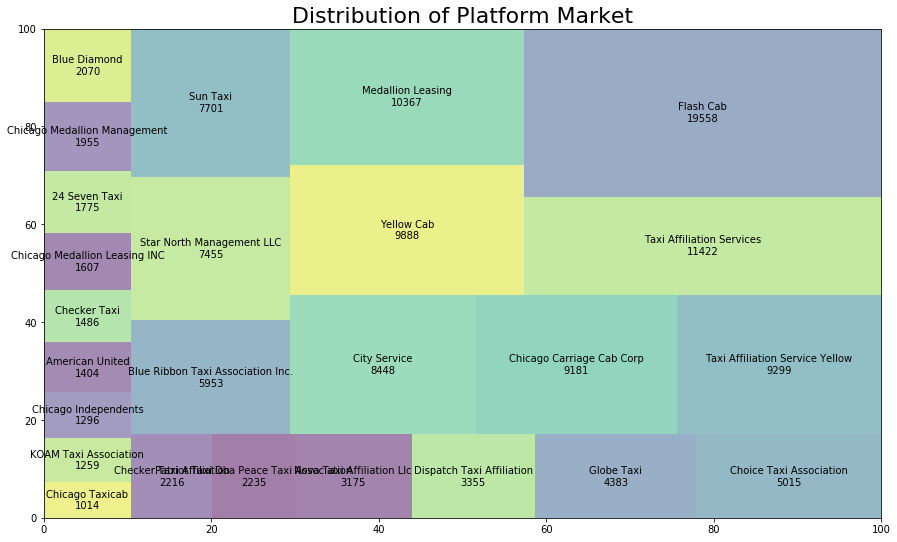

In [12]:
# Plot only the top taxi companies
plotData = company_name_trips_amount.sort_values(by='trips_amount')
plotData = plotData[plotData['trips_amount'] > 1000] # Only taxi companies with > 1000 rides in a 1 day period
sizes = plotData.trips_amount.values.tolist()
labels = plotData.apply(lambda x: str(x[0]) + "\n" + str(round(x[1])),axis=1)
plt.figure(figsize=(15,9))
squarify.plot(sizes=sizes,label=labels,alpha=0.5)

plt.title('Distribution of Platform Market', fontsize=22)


To graph the taxi companies and the number of rides they had in the period of Nov 15-16, 2017, I sorted the company_name_trips_amount table by trips_amounts and cut off any taxi company who had less than 1000 rides in the 1 day period.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Top taxi companies and dropoff locations were identified and visualized successfully!

</div>

# Part 4: Hypothesis Testing

# Test whether the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays


In [13]:
# import query data
loop_airport_rides = pd.read_csv('/datasets/project_sql_result_07.csv')

# drop Nans
loop_airport_rides = loop_airport_rides.dropna()

# rainy Saturday data (180 rows)
rainy_rides = loop_airport_rides[loop_airport_rides['weather_conditions'] == 'Bad']

# calculate average duration of rainy Saturday rides
avgRainyRideDuration = rainy_rides['duration_seconds'].mean()
avgRainyRideDuration = (avgRainyRideDuration/60).round(decimals=2)
print('The average duration of rainy Saturday rides is: ' + str(avgRainyRideDuration) + " minutes")

# non-rainy Saturday data (888 rows)
nonrainy_rides = loop_airport_rides[loop_airport_rides['weather_conditions'] == 'Good']

# calculate average duration of non rainy Saturday rides
avgNonRainyRideDuration = nonrainy_rides['duration_seconds'].mean()
avgNonRainyRideDuration = (avgNonRainyRideDuration/60).round(decimals=2)
print('The average duration of non-rainy Saturday rides is: ' + str(avgNonRainyRideDuration) + " minutes")

# perform a t-test
results = st.ttest_ind(rainy_rides['duration_seconds'], nonrainy_rides['duration_seconds'], equal_var=False)
p_value = results.pvalue
alpha = 0.05

if p_value < alpha:
    print('Reject H0')
else:
    print('Cannot reject H0')


The average duration of rainy Saturday rides is: 40.45 minutes
The average duration of non-rainy Saturday rides is: 33.33 minutes
Reject H0


We want to test the hypothesis that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays. The imported data file provides us with trip logs (start datetime, weather condition, duration of ride in seconds) for Saturdays in November of 2017. We can test the hypothesis using an independent samples t-test to compare the average duration of the ride (in seconds) from the two groups (good weather conditions and bad weather conditions). We can apply a t-test here due to the Central Limit Theorem, which implies that you can estimate the mean of a statistical population usin the mean of a sample. Since the means are approximately normally distributed - we can use the t-test.

Null Hypothesis H0: The average duration of rides from the Loop to O'Hare Airport is the same on rainy Saturdays as it is on non-rainy Saturdays. Alternative Hypothesis H1: The average duration of rides from the Loop to O'Hare Airport differs on rainy Saturdays from non-rainy Saturdays.

The p_value suggests that we should reject the null hypothesis, thus indicating that the average duration of rides from the Loop to O'Hare Airport differs on rainy Saturdays from non-rainy Satudays. This means that the sample results have a rare outcome and therefore it is very unlikely that it's just a lucky significance. This can be further proven by looking at the numbers: the average duration of rainy Saturday rides is 40.45 minutes, while the average duration of non-rainy Saturday rides is 33.33 minutes. This 7 minute difference between rainy and non-rainy days can be enough to miss a flight!

# Part 5 : Findings and conclusions

To conclude, in this report, we examined three datasets generated from the previous preprocessing of both website data on weather and SQL database data on taxi rides.

The exploratory analysis of the data shows the ditribution of the number of rides over two days in November for 64 taxi companies. It identified that majority of the taxi companies had under 2500 trips, whereas some top performing companies managed to have had over 10,000 trips. This is useful information about market demand for Zuber, and the characteristics of high performing companies might also be further examined to provide some business insights.

The information about the top 10 neighbourhoods for average dropoffs might be valuable for Zuber in terms of where to direct drivers. If these are residential areas, people living in those areas are likely to be frequent cab users. If these are recreational areas, then a higher concentration of rides will be needed when it's time for people to go home.

Finally, our hypothesis test shows that the average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Saturdays. This indicates that a different pricing mechanism is needed for different weather conditions.